## update the tail coordiantes figure

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [3]:
# pick the start and end theta
cluster_theta = 2*np.pi/8
dtheta = 3*np.pi/8
theta = np.linspace(cluster_theta-dtheta, cluster_theta+dtheta, 1000)
R = 1
x = R * np.cos(cluster_theta)
y = R * np.sin(cluster_theta)
z = np.zeros_like(x)
ro = np.array([x, y, z])
orbit = R*np.array([np.cos(theta), np.sin(theta), np.zeros_like(theta)])

In [4]:
# particle position, based on the cluster center
ddtheta = 3*np.pi/16
Rp = 1.5
green_theta = np.linspace(cluster_theta-ddtheta, cluster_theta, 1000)
rp = [Rp*np.cos(cluster_theta-ddtheta), Rp*np.sin(cluster_theta-ddtheta), 0.5]
xprime_curve_x,xprime_curve_y,xprime_curve_z=R*np.cos(green_theta),R*np.sin(green_theta),np.zeros_like(green_theta)

In [5]:
# get the near point 
r_near = np.array([R*np.cos(cluster_theta-ddtheta), R*np.sin(cluster_theta-ddtheta), 0])
xprime_vector = np.linalg.cross(np.array([0,0,1]),r_near)

In [6]:
rotate_about_z_axis = lambda theta,vec: np.matmul(np.array([[np.cos(theta), -np.sin(theta), 0],
                                                [np.sin(theta), np.cos(theta), 0],
                                                [0, 0, 1]]),vec)

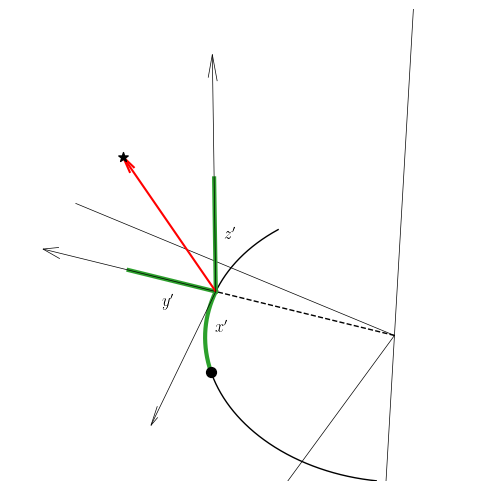

In [9]:
limit = 2
fig=plt.figure(constrained_layout=True)
ax=fig.add_subplot(111,projection='3d')
ax.set_axis_off()

# plot the axes
ax.plot([0, limit], [0, 0], [0, 0], color='black', linewidth=0.5)
ax.plot([0, 0], [0, limit], [0, 0], color='black', linewidth=0.5)
ax.plot([0, 0], [0, 0], [-limit, limit], color='black', linewidth=0.5)

# add the R_near "unit vector"
ax.plot([0,r_near[0]],[0,r_near[1]],[0,r_near[2]], color='black', linewidth=1, linestyle='dashed')

# add arrow from near to particle
ax.quiver(r_near[0],r_near[1],r_near[2],rp[0]-r_near[0],rp[1]-r_near[1],rp[2]-r_near[2], color='red', arrow_length_ratio=0.1)

# add the curves
ax.plot(orbit[0], orbit[1], orbit[2], color='black', linewidth=1)
ax.plot(xprime_curve_x,xprime_curve_y,xprime_curve_z, color="tab:green", linewidth=3)
# ax.quiver(xnear,ynear,znear,rp[0]-xnear,rp[1]-ynear,rp[2]-znear, color='black', arrow_length_ratio=0.1)



# make the xprime coordinate system
ax.quiver(r_near[0],r_near[1],r_near[2],
          xprime_vector[0],
          xprime_vector[1],
          xprime_vector[2], 
          color='black', arrow_length_ratio=0.1,linewidth=0.5)

ax.quiver(r_near[0],r_near[1],r_near[2],
          0,0,1, 
          color='black', arrow_length_ratio=0.1,linewidth=0.5)

ax.quiver(r_near[0],r_near[1],r_near[2],
          r_near[0],r_near[1],r_near[2], 
          color='black', arrow_length_ratio=0.1,linewidth=0.5)

# add the cluster center and the particle
ax.scatter(ro[0], ro[1], ro[2], color='black', s=50)
ax.scatter(rp[0], rp[1], rp[2], color='black', s=50, marker="*")


# add green y' and z' 
ax.plot(
    [r_near[0],rp[0]],
    [r_near[1],rp[1]],
    [r_near[2],r_near[2]+xprime_vector[2]],
    color="tab:green", linestyle='-', linewidth=3)
ax.plot(
    [r_near[0],r_near[0]],
    [r_near[1],r_near[1]],
    [r_near[2],rp[2]],
    color="tab:green", linestyle='-', linewidth=3)



### THE LABELS 
# x'
# get the angle between cluster and r_near
xprimetheta=(cluster_theta + np.atan2(r_near[1],r_near[0]))/2
xtextpos = 0.95*rotate_about_z_axis(xprimetheta,[1,0,0])
ax.text(xtextpos[0],xtextpos[1],xtextpos[2], r"$x'$", color='black', fontsize=12)
# y'
factor = 1 + (np.sqrt(rp[0]**2 + rp[1]**2) - 1)/2 
rotation_angle = np.pi/20
ytextpos = factor*rotate_about_z_axis(rotation_angle,r_near)
ax.text(ytextpos[0],ytextpos[1],ytextpos[2], r"$y'$", color='black', fontsize=12)
# z'
scale = 0.95
ax.text(scale*r_near[0],scale*r_near[1],rp[2]/2, r"$z'$", color='black', fontsize=12)
ax.view_init(elev=45, azim=120)  
ax.set_aspect("equal")


RADIUS = 1.1 # Control this value.
ax.set_xlim3d(0, RADIUS )
ax.set_zlim3d(0, RADIUS )
ax.set_ylim3d(0, RADIUS )

fig.savefig("../paper/tailcoordinates.png", dpi=300)